In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Data set descripition

* Brand (object): The car manufacturer 
* Model (object): The specific model of the car.
* Year (int64): The manufacturing year of the car 
* Engine_Size (float64): The size of the engine in liters
* Fuel_Type (object): The type of fuel used
* Transmission (object): The type of transmission
* Mileage (int64): The total distance the car has traveled, in kilometers
* Doors (int64): The number of doors
* Owner_Count (int64): The number of previous owners
* Price (int64): The selling price of the car in USD

In [2]:
df = pd.read_csv("car_price_dataset.csv")
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
brand = pd.get_dummies(df['Brand'])
model = pd.get_dummies(df['Model'])
fueltype =  pd.get_dummies(df["Fuel_Type"])
Transmission = pd.get_dummies(df["Transmission"])

In [5]:
df  =pd.concat([df,brand],axis=1)
df  =pd.concat([df,model],axis=1)
df  =pd.concat([df,fueltype],axis=1)
df  =pd.concat([df,Transmission],axis=1)

In [6]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price', 'Audi', 'BMW', 'Chevrolet',
       'Ford', 'Honda', 'Hyundai', 'Kia', 'Mercedes', 'Toyota', 'Volkswagen',
       '3 Series', '5 Series', 'A3', 'A4', 'Accord', 'C-Class', 'CR-V',
       'Camry', 'Civic', 'Corolla', 'E-Class', 'Elantra', 'Equinox',
       'Explorer', 'Fiesta', 'Focus', 'GLA', 'Golf', 'Impala', 'Malibu',
       'Optima', 'Passat', 'Q5', 'RAV4', 'Rio', 'Sonata', 'Sportage', 'Tiguan',
       'Tucson', 'X5', 'Diesel', 'Electric', 'Hybrid', 'Petrol', 'Automatic',
       'Manual', 'Semi-Automatic'],
      dtype='object')

In [7]:
#df = df.drop(["Transmission","Fuel_Type","Model","Brand"],axis='columns')

In [8]:
X = (df.drop(['Price',"Transmission","Fuel_Type","Model","Brand"], axis='columns'))
y = (df.Price)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [10]:
model = linear_model.LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred= model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 20.98801109701395


In [12]:
df['Brand'].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [13]:
df['Transmission'].value_counts()

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64

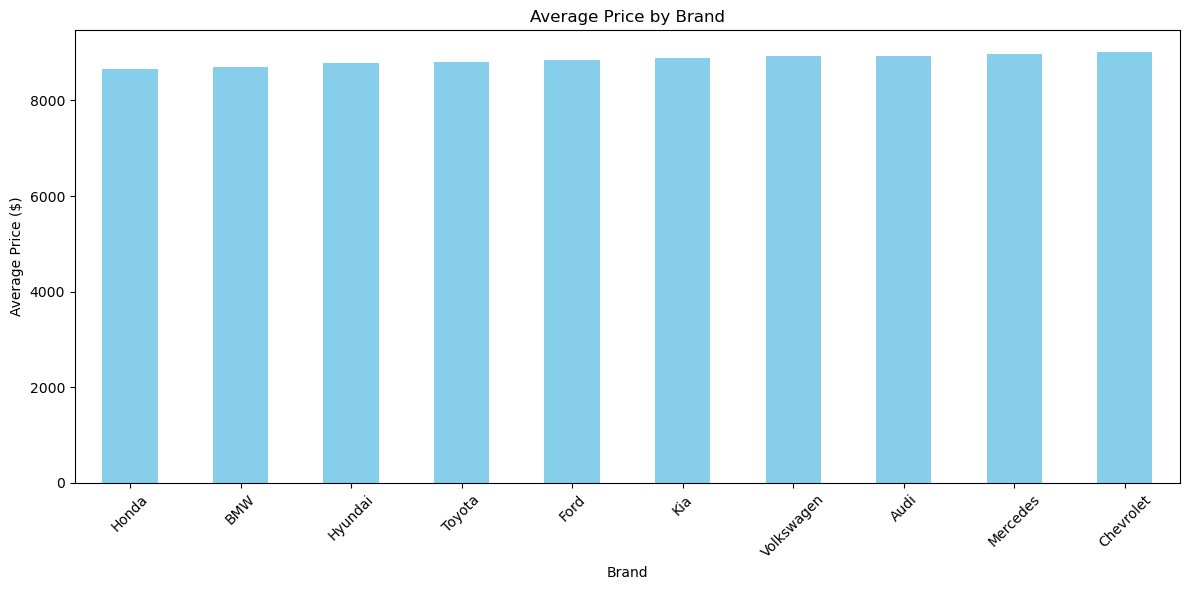

In [14]:
# 1. Bar Chart: Average Price by Brand
plt.figure(figsize=(12, 6))
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values()
avg_price_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

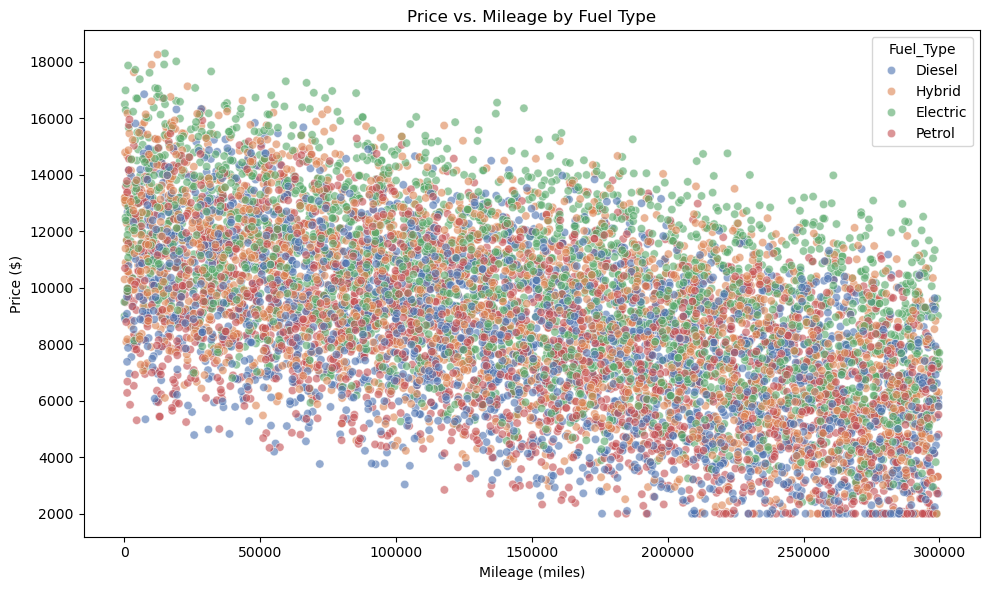

In [15]:
# 2. Scatter Plot: Price vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='Fuel_Type', data=df, palette='deep', alpha=0.6)
plt.title('Price vs. Mileage by Fuel Type')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

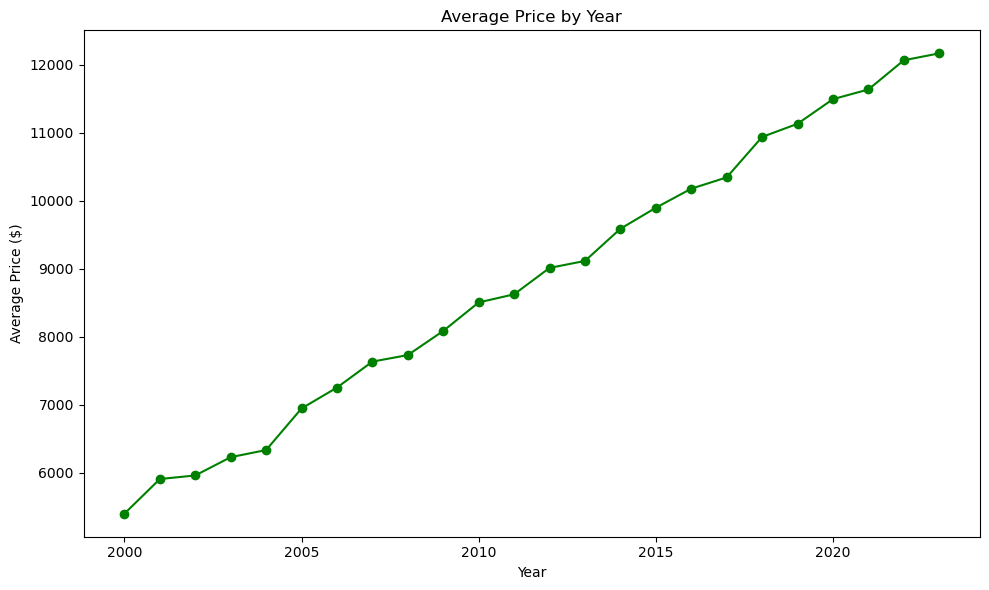

In [16]:
# 3. Line Graph: Average Price by Year
plt.figure(figsize=(10, 6))
avg_price_by_year = df.groupby('Year')['Price'].mean()
avg_price_by_year.plot(kind='line', marker='o', color='green')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

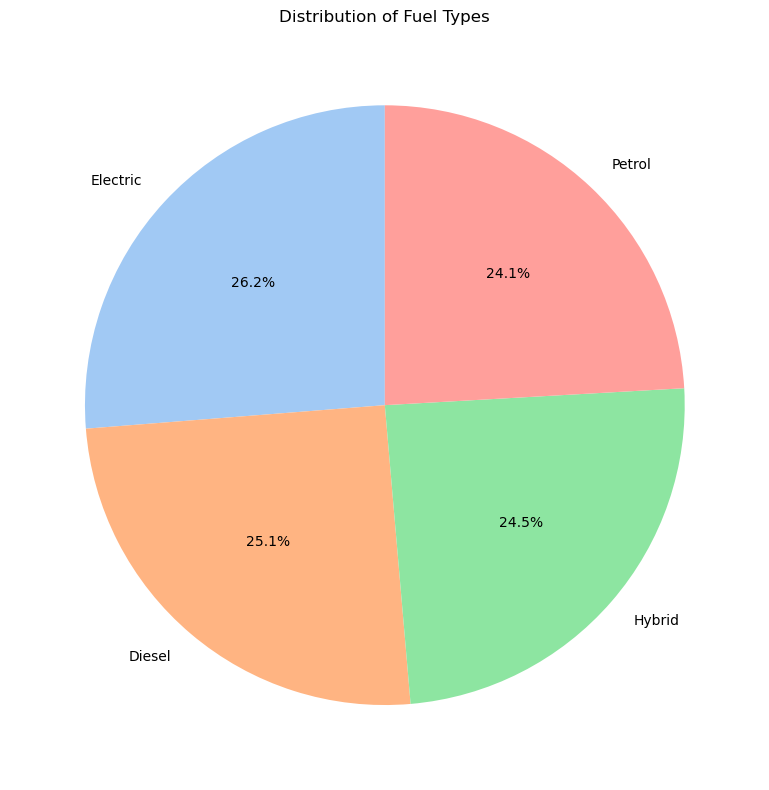

In [17]:
# 4. Pie Chart: Distribution of Fuel Types
plt.figure(figsize=(8, 8))
fuel_type_dist = df['Fuel_Type'].value_counts()
plt.pie(fuel_type_dist, labels=fuel_type_dist.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Fuel Types')
plt.tight_layout()
plt.show()

C:\Users\gunav\AppData\Local\Temp\ipykernel_25384\2178805237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='muted')


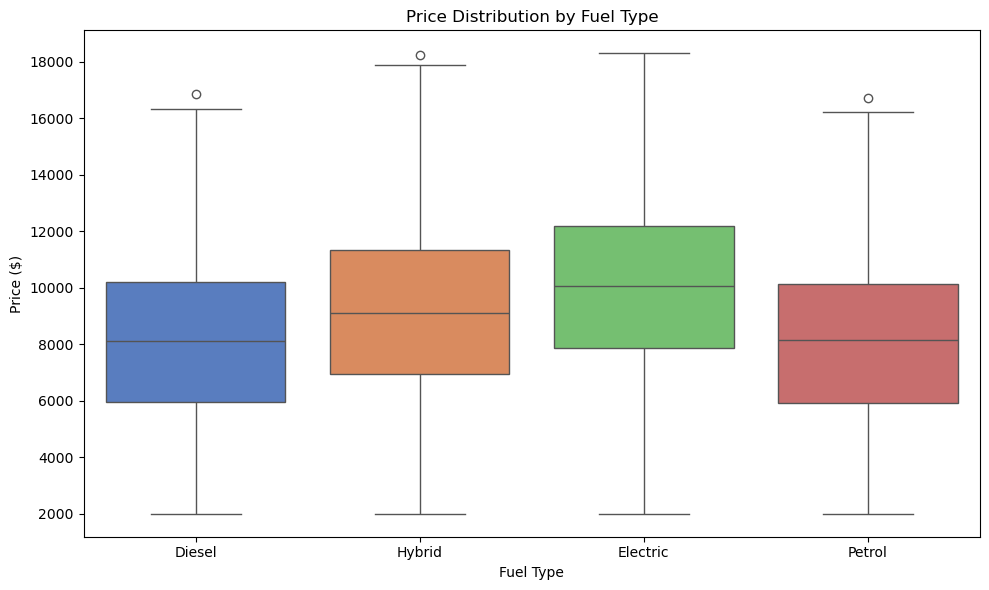

In [ ]:
# 5. Box Plot: Price Distribution by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='muted')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

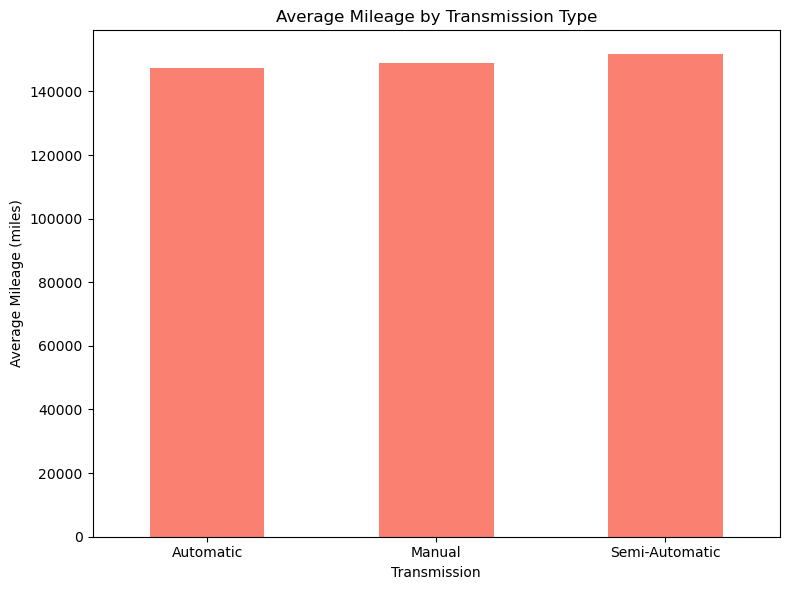

In [19]:
# 6. Bar Chart: Average Mileage by Transmission Type
plt.figure(figsize=(8, 6))
avg_mileage_by_trans = df.groupby('Transmission')['Mileage'].mean().sort_values()
avg_mileage_by_trans.plot(kind='bar', color='salmon')
plt.title('Average Mileage by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Mileage (miles)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

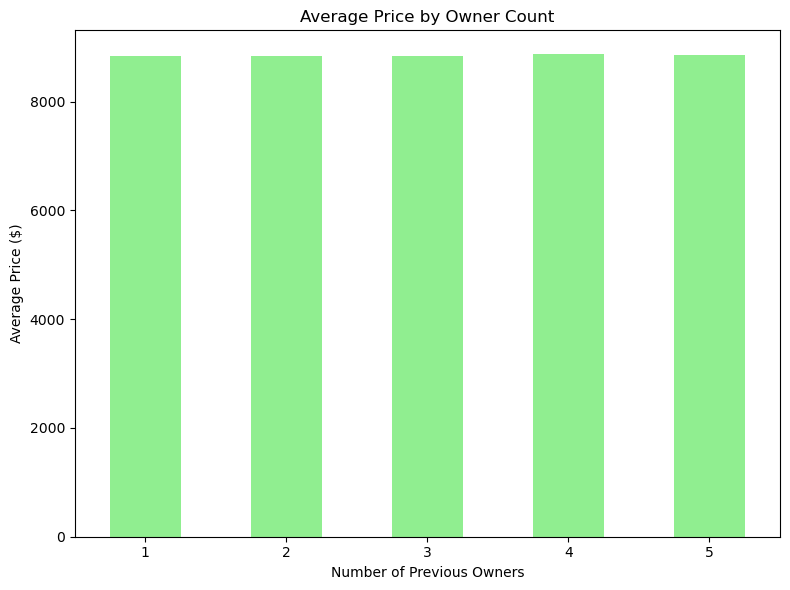

In [20]:
# 9. Bar Chart: Average Price by Owner Count
plt.figure(figsize=(8, 6))
avg_price_by_owners = df.groupby('Owner_Count')['Price'].mean().sort_index()
avg_price_by_owners.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Owner Count')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

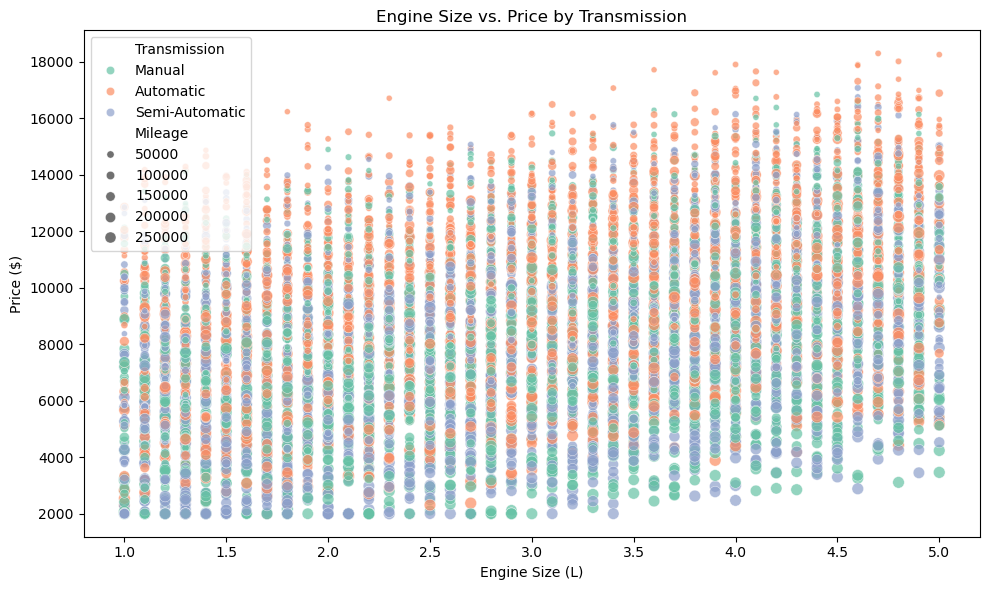

In [21]:
# 10. Scatter Plot: Engine Size vs. Price with Transmission Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine_Size', y='Price', hue='Transmission', size='Mileage', data=df, palette='Set2', alpha=0.7)
plt.title('Engine Size vs. Price by Transmission')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

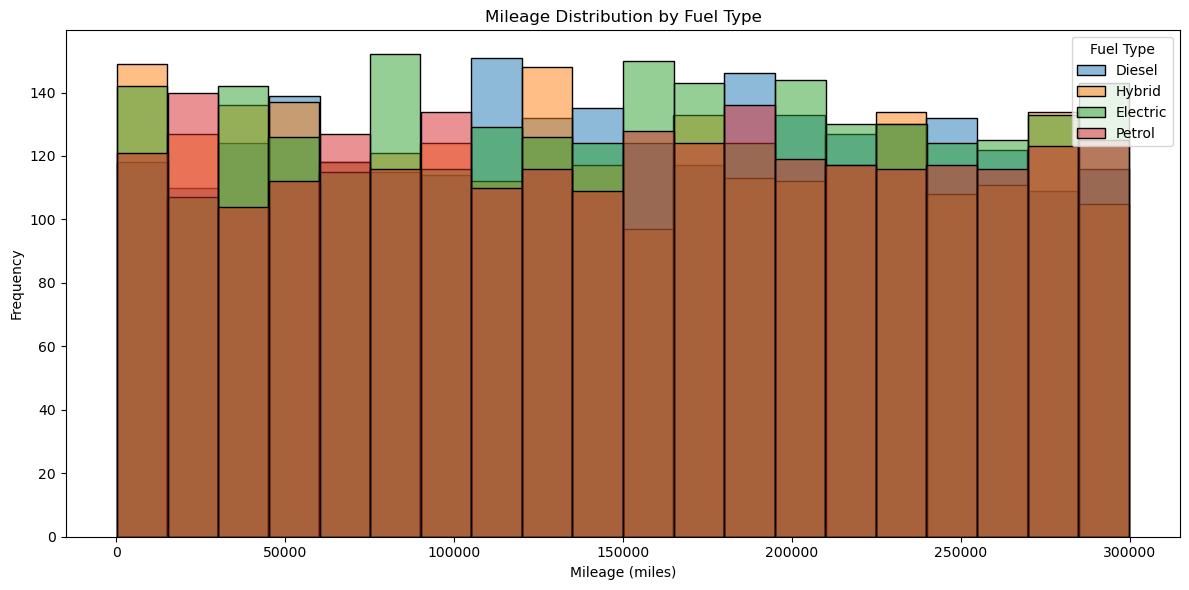

In [22]:
# 12. Histogram: Mileage Distribution by Fuel Type
plt.figure(figsize=(12, 6))
for fuel in df['Fuel_Type'].unique():
    sns.histplot(df[df['Fuel_Type'] == fuel]['Mileage'], bins=20, label=fuel, alpha=0.5)
plt.title('Mileage Distribution by Fuel Type')
plt.xlabel('Mileage (miles)')
plt.ylabel('Frequency')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

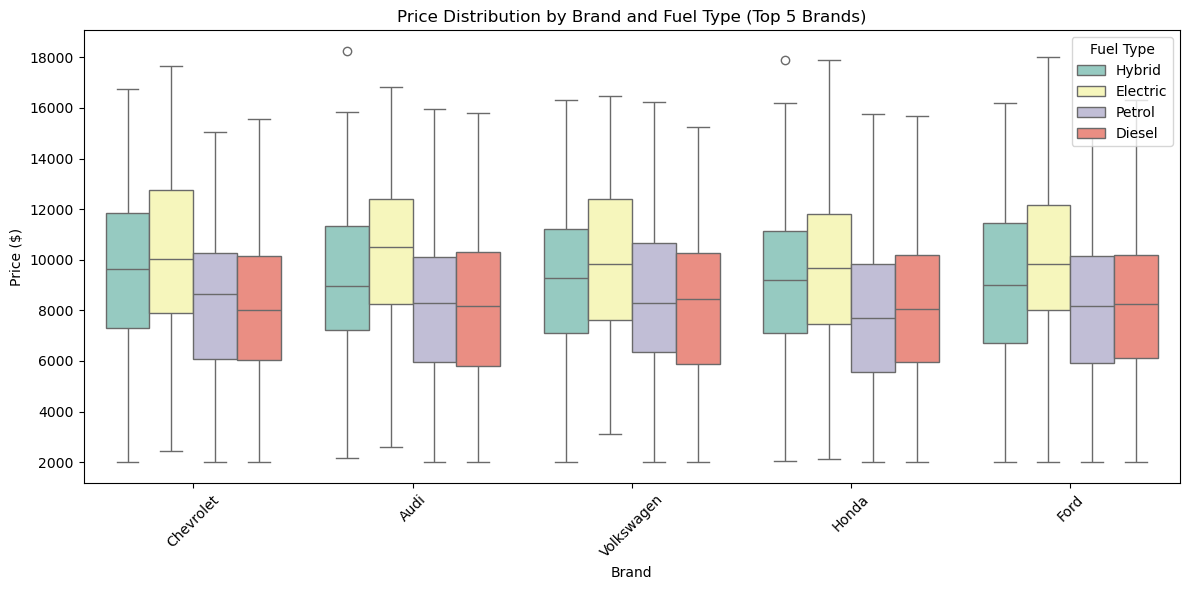

In [23]:
# 13. Box Plot: Price by Brand and Fuel Type (Top 5 Brands)
top_brands = df['Brand'].value_counts().index[:5]  # Top 5 most frequent brands
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', hue='Fuel_Type', data=df[df['Brand'].isin(top_brands)], palette='Set3')
plt.title('Price Distribution by Brand and Fuel Type (Top 5 Brands)')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()